In [26]:
import json
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.svm import SVC
from sklearn.metrics import ConfusionMatrixDisplay
import matplotlib.pyplot as plt
from datasetPreprocess import DatasetPreprocess


In [27]:
PREPROCESS_DATA = False

In [28]:
preprocess = DatasetPreprocess()

In [29]:
if PREPROCESS_DATA:
    preprocess.save_pitch()

In [30]:
def load_data(data_path):
    with open(data_path, "r") as fp:
        data = json.load(fp)

    X = np.array(data["pitch"])
    y = np.array(data["labels"])
    mapping = np.array(data["mapping"])
    return X, y, mapping

In [31]:
X, y, mapping = load_data("data.json")

In [32]:
labels = np.unique(y)

In [33]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30)

In [34]:
print(labels)

[ 0  1  2  3  4  5  6  7  8  9 10]


In [35]:
#Create a SVM Classifier
svclassifier_lin = SVC(kernel='linear')
svclassifier_rbf = SVC(kernel='rbf')

In [36]:
#Train the model using the training sets
svclassifier_lin.fit(X_train, y_train)
svclassifier_rbf.fit(X_train, y_train)

SVC()

In [37]:
#Predict the response for test dataset
y_pred_lin = svclassifier_lin.predict(X_test)
y_pred_rbf = svclassifier_rbf.predict(X_test)

In [38]:
print("test size: ", len(y_test))
print("train size: ",len(y_train))

test size:  978
train size:  2282


In [39]:
err_count_lin=0
err_count_rbf=0
for i in range(len(y_test)):
    if y_test[i]!=y_pred_rbf[i]:
        err_count_rbf+=1
    if y_test[i]!=y_pred_lin[i]:
        err_count_lin+=1

print("SVM: Linear")
print("number of errors: ", err_count_lin)
print("accuracy: ", metrics.accuracy_score(y_test, y_pred_lin))
print("precision: ", metrics.precision_score(y_test, y_pred_lin, average='weighted'))
print("recall: ", metrics.recall_score(y_test, y_pred_lin, average='weighted'))
print("\n\n")
print("SVM: radial basis function")
print("number of errors: ", err_count_rbf)
print("accuracy: ", metrics.accuracy_score(y_test, y_pred_rbf))
print("precision: ", metrics.precision_score(y_test, y_pred_rbf, average='weighted'))
print("recall: ", metrics.recall_score(y_test, y_pred_rbf, average='weighted'))

SVM: Linear
number of errors:  322
accuracy:  0.6707566462167689
precision:  0.8534952806866614
recall:  0.6707566462167689



SVM: radial basis function
number of errors:  284
accuracy:  0.7096114519427403
precision:  0.821110390611584
recall:  0.7096114519427403


In [40]:
np.set_printoptions(precision=2)

Confusion matrix, without normalization
[[ 59   5   0   0   0   0   1   0   0   0   0]
 [  1  76   0   1   0   0   1   0  49   0   0]
 [  0   0  63   0   0   0   0   1   0   0   0]
 [  0   0   0  66   0   0   0   0  44   0   1]
 [  0   0   1   0  29  22   0   0   0   0   0]
 [  0   2   0   0   0  72   0   0  49   0   0]
 [  0   0   0   0   0   0  50   1   0   0   0]
 [  0   0   0   0   0   0   2  66  47   1   0]
 [  0   2   0   0   0   0   0   0 102   0   1]
 [  0   0   0   0   0   0   0   1  51  61   1]
 [  0   0   0   0   0   0   0   0  37   0  12]]
Normalized confusion matrix
[[0.91 0.08 0.   0.   0.   0.   0.02 0.   0.   0.   0.  ]
 [0.01 0.59 0.   0.01 0.   0.   0.01 0.   0.38 0.   0.  ]
 [0.   0.   0.98 0.   0.   0.   0.   0.02 0.   0.   0.  ]
 [0.   0.   0.   0.59 0.   0.   0.   0.   0.4  0.   0.01]
 [0.   0.   0.02 0.   0.56 0.42 0.   0.   0.   0.   0.  ]
 [0.   0.02 0.   0.   0.   0.59 0.   0.   0.4  0.   0.  ]
 [0.   0.   0.   0.   0.   0.   0.98 0.02 0.   0.   0.  ]
 [0.   0

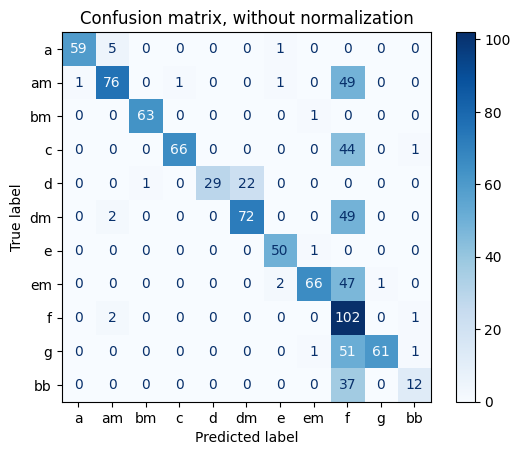

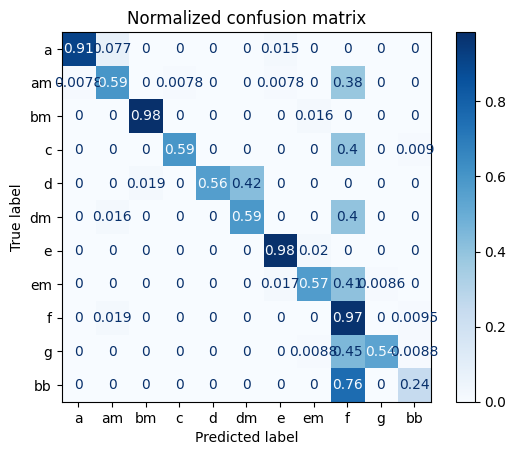

In [41]:
titles_options = [
    ("Confusion matrix, without normalization", None),
    ("Normalized confusion matrix", "true"),
]
for title, normalize in titles_options:
    disp = ConfusionMatrixDisplay.from_estimator(
        svclassifier_lin,
        X_test,
        y_test,
        display_labels=mapping,
        cmap=plt.cm.Blues,
        normalize=normalize,
    )
    disp.ax_.set_title(title)

    print(title)
    print(disp.confusion_matrix)